<font size="+3" color=purple ><b> <center>Data Driven Recomendation System for Drilling Bit Selection</center></b></font>
___
- **Author:** Badr Eddine Berrehal (*Petroleum Engineer & Data Detective*)
- **Email:** [berrehalbadr@gmail.com](berrehalbadr@gmail.com)
- **LinkedIn:** [Badr Berrehal](https://www.linkedin.com/in/badreddine-berrehal-a51010175)
- **Personal Web site:** [UDATA](https://sites.google.com/view/badreddine-berrehal/accueil)
- **GitHub:** [berrehalbadr](https://github.com/berrehalbadr)
- **License Type:** MIT license

## 1. Project Overview
The objective of any drilling operation is the safe execution of plans at optimum efficiency by minimizing non-productive time (NPT) with the reduction of travel to maintain profitable drilling for as long as possible. 
The drill bit, arguably the most critical component of the downhole assembly, plays a critical role in the process of unlocking the downhole resources and largely determines the potential for a successful operation.
However, choosing the right tool for the job is not as obvious as it may seem, there are numerous designs and, more interestingly, the nature of their behavior in relation to the complex blend of rocks and geological regimes in the different drilling phases.

## 2. Project Objective
Therefor the objective of this study is to first investigate and compare different drilling bit types and assess their performances with an emphasis on design, average rate of penetration, final dull/wearing grading, distance drilled and last but not list the who manufactured it.
Second is to build a recommendation system driven by data or as I like to call it crowd's wisdom (more than 100 engineers pick), that would provide suggestions taking in consideration the desired output and available resources

## 3. Data utilized
The data used is relatively modest, accounting for about 200 different drilling bits, a versatile set of aspects is provided covering drill and fluid characteristics, applied drilling parameters, drilled structure and formation and many others, the main aspects used for this study are listed below: 

| Variable | Description|
|:----------|:------------|
|Well| Well name |
|Size| Drill Bit Diameter (in) |
|Bit Number| Drill bit number |
|Reference| Drill bit reference ||Type| Drill bit type || Drill bit type || Drill bit number|
|Type| Drill bit type|
|Date in| Drill start date |Date in| Drill start date |Structure| Drilled structure|
|Structure| Drilled structure |
|Formation| Drilled formation |
|Footage| Number of feet drilled |
|Depth in| Drill start depth (ft) | |Depth in| Drill start depth (ft) |
|Depth out| Drill bit completion depth (ft) | |Depth Average| Drill depth (ft) |
|Depth Average| Drill bit average drilling depth (ft) | |Depth Average| Drill bit average depth (ft) |
|Blades| Number of drill bit blades|
|Cutter size| Drill bit cutter diameter (mm)| |Min Flow Rate|Min Flow Rate (ft)
|Min Flow Rate |Minimum Pumping Rate (gpm)|
|Max Flow Rate |Maximum Pumping Rate (gpm|)
|TFA |Total Flow Area (in2)|
|HSI| Hydraulic Horsepower (Hp/in2) |
|Min WOB| Minimum Weight on Bit (klb)| |
|Max WOB| Maximum weight on bit (klb)||Max WOB| Maximum weight on bit (klb)|
|Average ROP| Average Rate of Penetration (ft/hr)| | |Average ROP| Average Rate of Penetration (ft/hr)|
|Mud Weight| Fluid Density (ppg)||Dull Grading| Final grade (ppg)|
|Dull Grading|Drill Bit Final Grade|
|Drive System|Type of assembly|
|RPM Min| Minimum Revolutions per Minute (rpm)
|Max RPM| Maximum revolutions per minute (rpm)
|Minimum Torque|Minimum Torque (kft-lb)|
|Max torque|Max torque (kft-lb))|
|Manufacturer|Manufacturer|Manufacturer|

## 1. What is a drilling bit?
We will be covering the required backround as we surf trough the process of analysis to facilites the comprehension. As a starter lets get to know our equipement a bit more.

In the oil and gas industry, a drill bit is a tool designed to produce a generally cylindrical hole (wellbore) in the earth’s crust by the rotary drilling method for the discovery and extraction of hydrocarbons such as crude oil and natural gas. This type of tool is alternately referred to as a rock bit, or simply a bit. (*Wikipedia*)

In other words it's the subsurface resources key, and it comes in a versatile shapes and sizes accordingly to the requirements. Here below a couple of pictures depicting some communaly used designs.

<ipython-input-4-a368fadafbaf>:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_1.show()


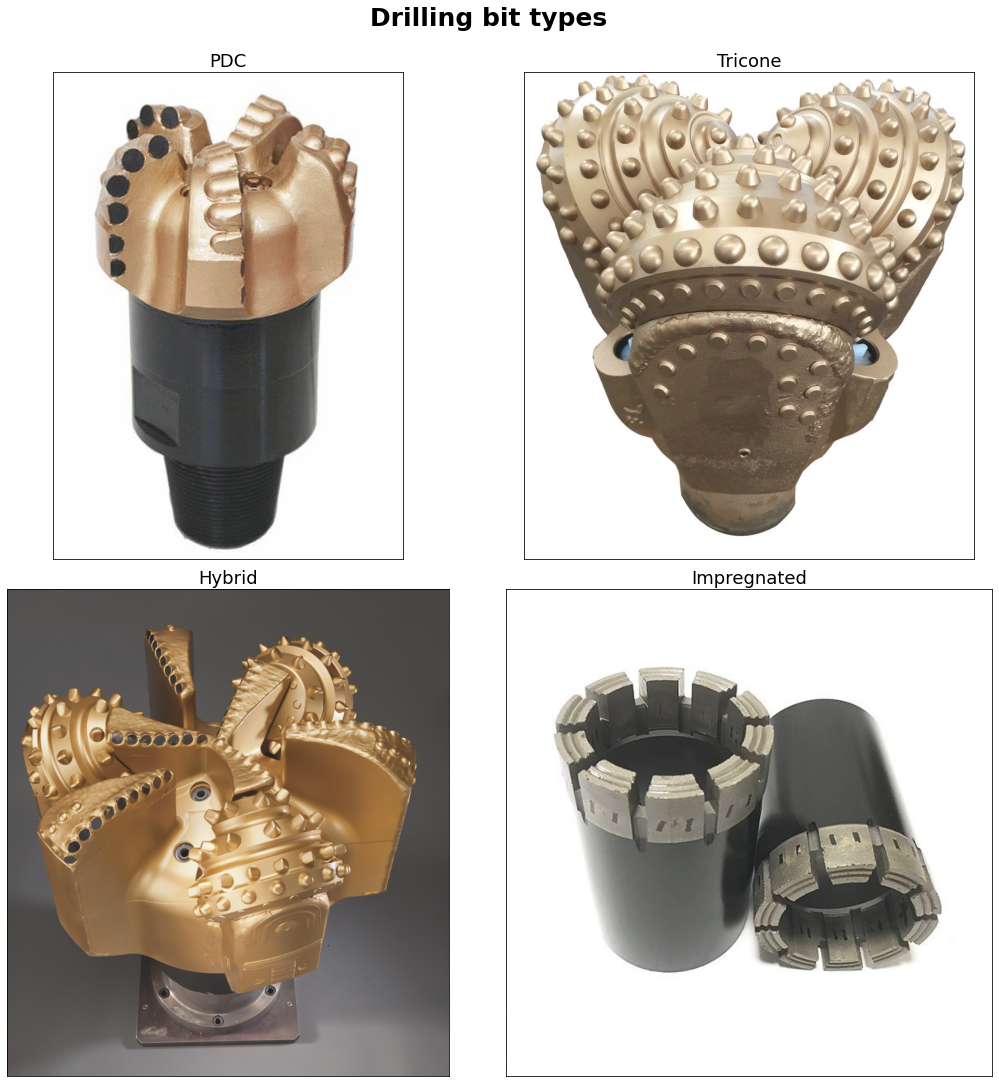

In [4]:
# Lets compare the average performance by bit type and by bit type in reference to the manufacturer
# Plotting the figures
fig_1= plt.figure(figsize=(15,15))
gs = fig_1.add_gridspec(2, 2)
fig_1.suptitle('Drilling bit types', fontsize=25, weight='bold', y=1)
ax_1 = fig_1.add_subplot(gs[0, 0])
ax_2 = fig_1.add_subplot(gs[0, 1])
ax_3 = fig_1.add_subplot(gs[1, 0])
ax_4 = fig_1.add_subplot(gs[1, 1])

ax_1.set_title("PDC", fontsize=18)
ax_2.set_title("Tricone", fontsize=18)
ax_3.set_title("Hybrid", fontsize=18)
ax_4.set_title("Impregnated", fontsize=18)

PDC=plt.imread("Img_tools/PDC.jpg")
Tricone=plt.imread("Img_tools/Tricone.jpg")
Impregnated=plt.imread("Img_tools/Impregnated.jpg")
Hybrid=plt.imread("Img_tools/Hybrid.png")

ax_1.imshow(PDC, alpha=0.9)
ax_2.imshow(Tricone, alpha=0.9)
ax_3.imshow(Hybrid, alpha=0.9)
ax_4.imshow(Impregnated, alpha=0.9)

ax_1.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
ax_2.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
ax_3.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
ax_4.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)


fig_1.tight_layout()
fig_1.show()

## 2. Types of drill bits
Drill bits are broadly classified into two main types according to their primary cutting mechanism. **Rolling cutter bits** drill largely by fracturing or **crushing** the formation with "tooth"-shaped cutting elements on two or more cone-shaped elements that roll across the face of the borehole as the bit is rotated. **Fixed cutter** bits employ a set of blades with very hard **cutting** elements, most commonly natural or synthetic diamond, to remove material by scraping or grinding action as the bit is rotated.

### 2.1 Rolling cutter bits
Modern commercial rolling cutter bits usually employ three cones to contain the cutting elements, although two cone or (rarely) four cone arrangements are sometimes seen. These bits mainly fall into two classes depending on the manufacture of the cutting elements or "teeth". Steel-tooth bits have cones that have wedge-shaped teeth milled directly in the cone steel itself. 

Extremely hard tungsten carbide material is often applied to the surfaces of the teeth by a welding process to improve durability. Tungsten carbide insert (TCI) bits have shaped teeth of sintered tungsten carbide press-fit into drilled holes in the cones. Some types of steel-tooth bits also have TCI elements in addition to the milled teeth. The cones rotate on roller or journal bearings that are usually sealed from the hostile down-hole drilling fluid environment by different arrangements of O-ring or metal face seals. These bits usually also have pressure compensated grease lubrication systems for the bearings.

### 2.2 Fixed cutter bits
Fixed cutter bits were the first type of drill bit employed in rotary drilling, and they are mechanically much simpler than rolling cutter bits. Because the cutting elements do not move relative to the bit, there is no need for bearings or lubrication. The most common cutting element in use today is the polycrystalline diamond cutter (PDC), a sintered tungsten carbide cylinder with one flat surface coated with a synthetic diamond material. The cutters are arranged on the blades of the bit in a staggered pattern with the diamond coated cutter surface facing the direction of bit rotation to provide full coverage of the borehole bottom. Other fixed cutter bits may employ natural industrial-grade diamonds or thermal stable polycrystalline diamond (TSP) cutting elements.

### 2.3 Hybrid cutter bits
There is also currently available, a hybrid type of bit that combines both rolling cutter and fixed cutter elements. 

By comparison, each has a specific role to play based on a series of parameters that include, but are not limited to, formation characteristics, desired results and, of course, budget. Ultimately, the selected drill bit must cost-effectively reach the targeted reservoir.

___
<font size="+3" color=blue ><b> <center>Section 1: Exploratory Data Analysis</center></b></font>
___

Okey that's enough for now let us start with the exploration and analysis of the data. We begin with the standard *Lib* importation as well as data loading, the data itself represented an accumulation of excel files. so it has been intially treated in a seperate notebook before loading it here (*I will show you how to do it some time soon*)

## A. Data and Libs Loading

In [3]:
# System Libs
import os
import sys

# Data wrangling and visualization libs
from tools_set.visuals import Multi_plot, Multi_hist
import seaborn as sns
import numpy as np # Numerical computation lib
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Read the Files
Csv_file_list = []
path = os.getcwd()+'\\Dataset'

# View contents of the path
files = os.listdir(path)

# Read the data from an excell file (sheet number one)
Data = pd.read_excel("Dataset/Data.xlsx", sheet_name=0)

We will have a lot of fun analysing the rest of the data base which includes NPT, DDRs, Well designs, etc. But let us focus on the drilling bits for the time being.

In [5]:
# Displaying basic informations on the available data 
display(
    print('Data'),
    print('\n'),
    Data.info(), # Info provides some basic details on each column
    Data.head()) # Head displays a snippet of the data (5 initial lines)

Data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Well                 212 non-null    object        
 1   Size                 212 non-null    float64       
 2   Bit_Number           212 non-null    int64         
 3   Re_Run               34 non-null     object        
 4   Reference            212 non-null    object        
 5   Type                 212 non-null    object        
 6   Date_in              206 non-null    datetime64[ns]
 7   Structure            212 non-null    object        
 8   Formation            211 non-null    object        
 9   Footage (ft)         212 non-null    int64         
 10  Depth in (ft)        212 non-null    int64         
 11  Depth out (ft)       212 non-null    int64         
 12  Depth Average (ft)   212 non-null    float64       
 13  Blades               186 non

None

None

None

,Well,Size,Bit_Number,Re_Run,Reference,Type,Date_in,Structure,Formation,Footage (ft),...,Max WOB (klb),Average_ROP,Mud Weight (ppg),Dull_Grading,Drive_System,Min_RPM,Max_RPM,Torque Max (kft-lb),Torque Min (kft-lb),Manufacturer
0,Florida 7,36.0,1,NaN,L3A,Tricone,2010-09-06,Anticlinal N,C5,82,...,13.0,10.10,8.5,0-0-NO-A-E-I-NO-TD,Rotary,60.0,80.0,5.0,3.0,Varel
1,Florida 7,26.0,2,NaN,T43,Tricone,2010-09-08,Anticlinal N,C5,15,...,23.0,8.30,8.5,NaN,Rotary,48.0,48.0,NaN,NaN,Hycalog
2,Florida 7,26.0,2,R,T43,Tricone,2010-09-09,Anticlinal N,C5,709,...,78.0,11.29,8.5,1-1-WT-A-E-I-BU-PR,RSS,47.0,73.0,NaN,NaN,Hycalog
3,Florida 7,26.0,2,R,T43,Tricone,2010-09-09,Anticlinal N,C6,547,...,78.0,11.29,8.5,1-1-WT-A-E-I-BU-PR,RSS,47.0,73.0,NaN,NaN,Hycalog
4,Florida 7,26.0,3,NaN,GTX-CM03,Tricone,2010-09-16,Anticlinal N,C6,438,...,55.0,14.32,9.6,2-3-WT-A-F-2-BU-TD,RSS,144.0,168.0,NaN,NaN,Hughes


Everything is ordinary so far, but we already can see some *Nan* values on a couple of colmuns, which indicates missing data.
We have a total of **212 instances** combined with **30 columns**, (*Not bad*) but it is relatively low in the case of building an machine learning model. Either way we will see about that. 

Let's look up data couverage.

<AxesSubplot:>

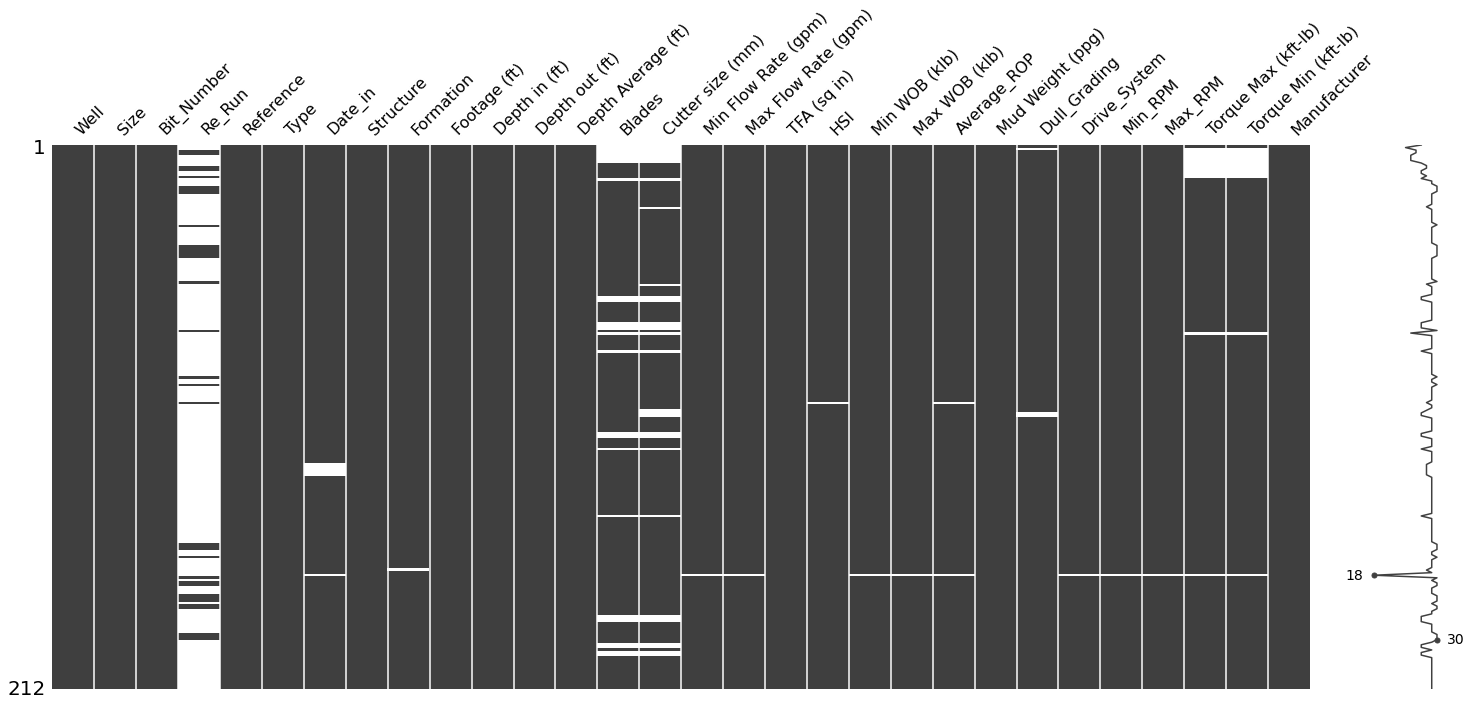

In [6]:
msno.matrix(Data)

Oh that's a nice start, the gaps (**the blank space**) is the missing data points, the ones that suffer most seem to be (*Re_Run*, *Blades*, *Cutter_Size*, and *Torque*). We will deal separately with each aspect below. 

## B. Exploratory Data Analysis and Treatment

### Catogorical features 
Let's start with the catogorical features, below we will QC them and see if there are any errors that can be dealt with.

In [7]:
# According to the info functio these are the 'Cat' paramters, you can also select them using Data.astype('categorical') 
# Lets look up the unique value simply count them.

cat= ['Well', 'Re_Run', 'Reference', 'Type', 'Structure', 'Formation', 'Dull_Grading', 'Drive_System', 'Manufacturer']
for att in cat:
    display(pd.DataFrame(Data[att].value_counts()))

,Well
Peru 9,65
Florida 7,59
Peru Sur 8,59
Florida 9,29


,Re_Run
R,23
RR,7
R5,3
R4,1


,Reference
MDSIR613WDPBX,11
Q408FX,6
Z716,5
MDSI819HSBPX,5
MDSIZ716BPX,5
...,...
HH378,1
FT816,1
FX84D,1
FX75D,1


,Type
PDC,173
Tricone,23
Impregnated,6
KYMERA,4
PDC (Rot),3
Hybrid,3


,Structure
Anticlinal F,60
Anticlinal M,46
Anticlinal G,32
Anticlinal P,30
Anticlinal N,29
Imbricate,9
Anticlinal D,6


,Formation
Mirador,57
C8,26
Los Cuervos,20
C7,19
Barco,17
C6,13
C5,9
Guadalupe,8
Sltn Market,4
C7,4


,Dull_Grading
1-2-WT-A-X-I-CT-PR,6
1-4-WT-S X-I-BT-TD,5
1-3-WT-A-X-I-CT-TD,5
3-4-WT-S X-I-CT-BHA,5
0-1-WT-G X-I-CT-DTF,4
...,...
5-3-RO-N-X-I-PN/CT-PP,1
1-1-WT-A-X-I-PN-PP,1
2-2-WT-S-X-I-CT-PR,1
1-2-WT-A-E-I-BT-PR,1


,Drive_System
RSS,88
Rotary,54
PWD XCeed,22
PWD X6,17
Motor,16
Turbine,5
PWD Archer,4
PWD Xceed,3
PWD,2


,Manufacturer
Smith,92
Hughes,74
Hycalog,17
NOV,13
Halliburton,10
Security,5
Varel,1


Various are the categories and various are the distributions, the code snippet below represents some modifications that have been established to standarize the categories:
- **Type :** The *KYMERA* is a Hybrid bit type, and of course we need to turn *PDC (Rot)* to simply *PDC*.
- **Formation :** Some duplicates are present within the *C*'s formations, so we need to treat that as well.
- **Drive_System :** All of the *Power Drive (PWD)* instances are a *Rotary Steerable System (RSS)*
- **Manufacturer :** Here the *NOV* has to be changed to *Hycalog*.

___
**Code minute**

To replace some kind of a group according to a condition, you can localize them using *.loc()*, the following syntax is applied: *DataFrame.loc[(condition_1)]*, then you simply indicate the column that you want to modify  *DataFrame.loc[(condition_1) , 'Colmun_to_modify']* and you equal it to the new value desired.
___

In [8]:
# Drilling Bit Types
Data.loc[Data["Type"]=="KYMERA", "Type"]="Hybrid"
Data.loc[Data["Type"]=="PDC (Rot)", "Type"]="PDC"

# Formation Name
Data.loc[Data["Formation"]=="Ftl to C5", "Formation"]="C5"
Data.loc[Data["Formation"]=="Intra C5", "Formation"]="C5"
Data.loc[Data["Formation"]=="Nunchia Flt to C5", "Formation"]="C5"
Data.loc[Data["Formation"]=="c5", "Formation"]="C5"
Data.loc[Data["Formation"]=="Flt to C8", "Formation"]="C8"
Data.loc[Data["Formation"]=="Flt intra C8", "Formation"]="C8"
Data.loc[Data["Formation"]=="Ftl to C7", "Formation"]="C7"
Data.loc[Data["Formation"]=="Flt Intra C7 ", "Formation"]="C7"
Data.loc[Data["Formation"]=="C7 ", "Formation"]="C7"

# Drive System Assembly Type
Data.loc[Data["Drive_System"]=="PWD XCeed", "Drive_System"]="RSS"
Data.loc[Data["Drive_System"]=="PWD X6", "Drive_System"]="RSS"
Data.loc[Data["Drive_System"]=="PWD Archer", "Drive_System"]="RSS"
Data.loc[Data["Drive_System"]=="PWD Xceed", "Drive_System"]="RSS"
Data.loc[Data["Drive_System"]=="PWD", "Drive_System"]="RSS"

# Manufactors
Data.loc[Data["Manufacturer"]=="NOV", "Manufacturer"]="Hycalog"

Now let's look up the distributions across the different categorical aspects, such as drilling bit types, structures, lithologies and hence, we will be trying to answer the following basic questions, (**In the context of the available data**).
- What **type of drill bit** is most commonly used?
- What are the **company's** most commonly used drill bits?
- What are the most commonly used **drill drive systems**?
- What are the most common **drilling structures**?
- What **lithology** is most commonly drilled or encountered?

___
**Notice :** I'm not getting to the code itself to generate the plots, we will focus on the insights aspect. *(No worries tho, It's really simple)* but we will save it for a Notebook dedicated for the soul purpose of visualization.

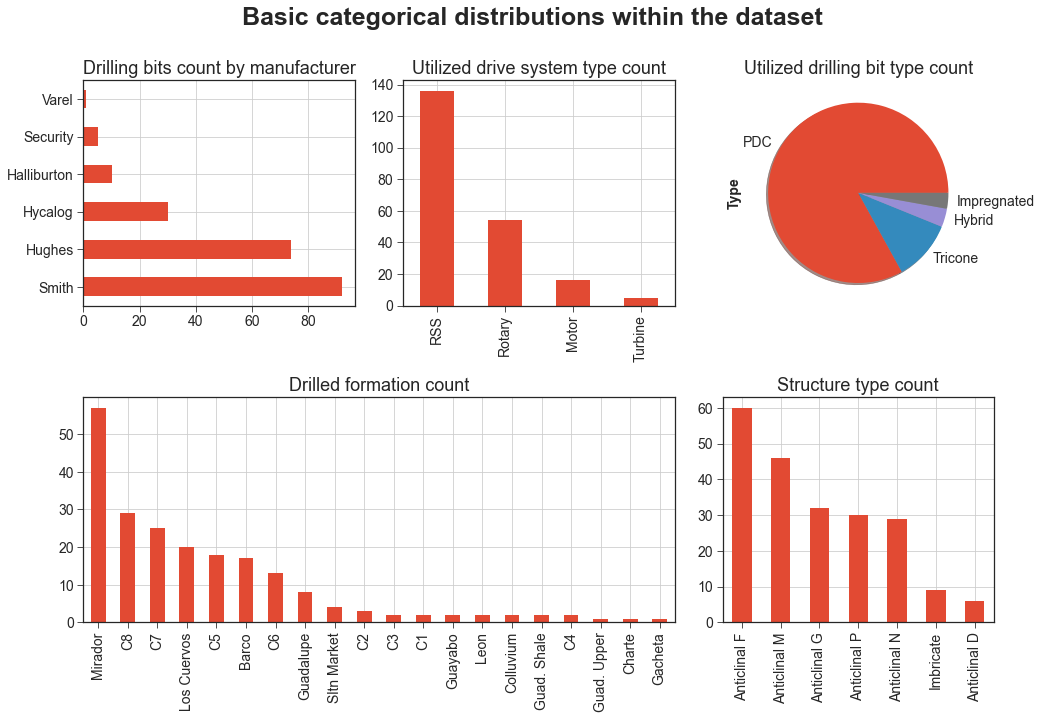

In [10]:
Multi_plot(figsize=(15,10), grid=(2, 3),suptitle=('Basic categorical distributions within the dataset'),
          Axes=[[0, 0], [0, 1], [0, 2], [1, 0:2], [1, 2]],
          Titles=["Drilling bits count by manufacturer", "Utilized drive system type count", 
                "Utilized drilling bit type count","Drilled formation count", "Drilled structure type count"],
          Plot_types=["barh", "bar",  "pie", "bar","bar"],
          Data=[pd.DataFrame(Data["Manufacturer"].value_counts())["Manufacturer"],
               pd.DataFrame(Data["Drive_System"].value_counts())["Drive_System"],
               pd.DataFrame(Data["Type"].value_counts())["Type"],
               pd.DataFrame(Data["Formation"].value_counts())["Formation"],
               pd.DataFrame(Data["Structure"].value_counts())["Structure"]])

Well the results are pretty much self-explonatory:
- The **Smith** drill bits a (*Schlumberger* company) are the most used, followed respectively by *Hughes*, *Hycalog*, *Halliburton*, *Security* and finally *Varel*.
- It is interesting to see that **RSS** is the most used, it is a relatively advanced technology, which means it is a bit more expensive, especially at the time of collecting this data, which potentially indicates that directional drilling was the main theme and that operators were concerned with maintaining the **Rotation Mode ROP**, which cannot be achieved using a **Motor** or **Turbine**, as this places the drill string in a mode called **Sliding**, in which surface rotation is stopped and the only RPM applied is that of the bit (*generated by the downhole motor*).
- **PDC**s are the main players in this data set, followed by Tricones, hybrids, and impregnated, which may indicate that the **formation was very compact**, hence the need for such a robust tool.
- The **Mirador formation** seems to be the most frequently cited, which could indicate that it is relatively **large** in size **or** that it is really **problematic**.
- The **anticlines** are the most encountered structure apparently, I'm not sure of the (**F, M, P..**) notations, but I assume they refer to different types according to theirs characteristics, so we're going to keep them as so.

Now that we've got the basics covered let's jump to some intresting combinations:
- What is the distribution of **drilling bit types** in relation to each **company**?
- What is the distribution of **drilling bit types** in relation to the **planned structure**?
- What is the distribution of **drilling bit types** in relation to the **drilled formation**?
- What is the distribution of the **drilling bit types** in relation to the **drill drive system**?
- What is the distribution of the **drilled structures** in relation to the **drilled formation**?

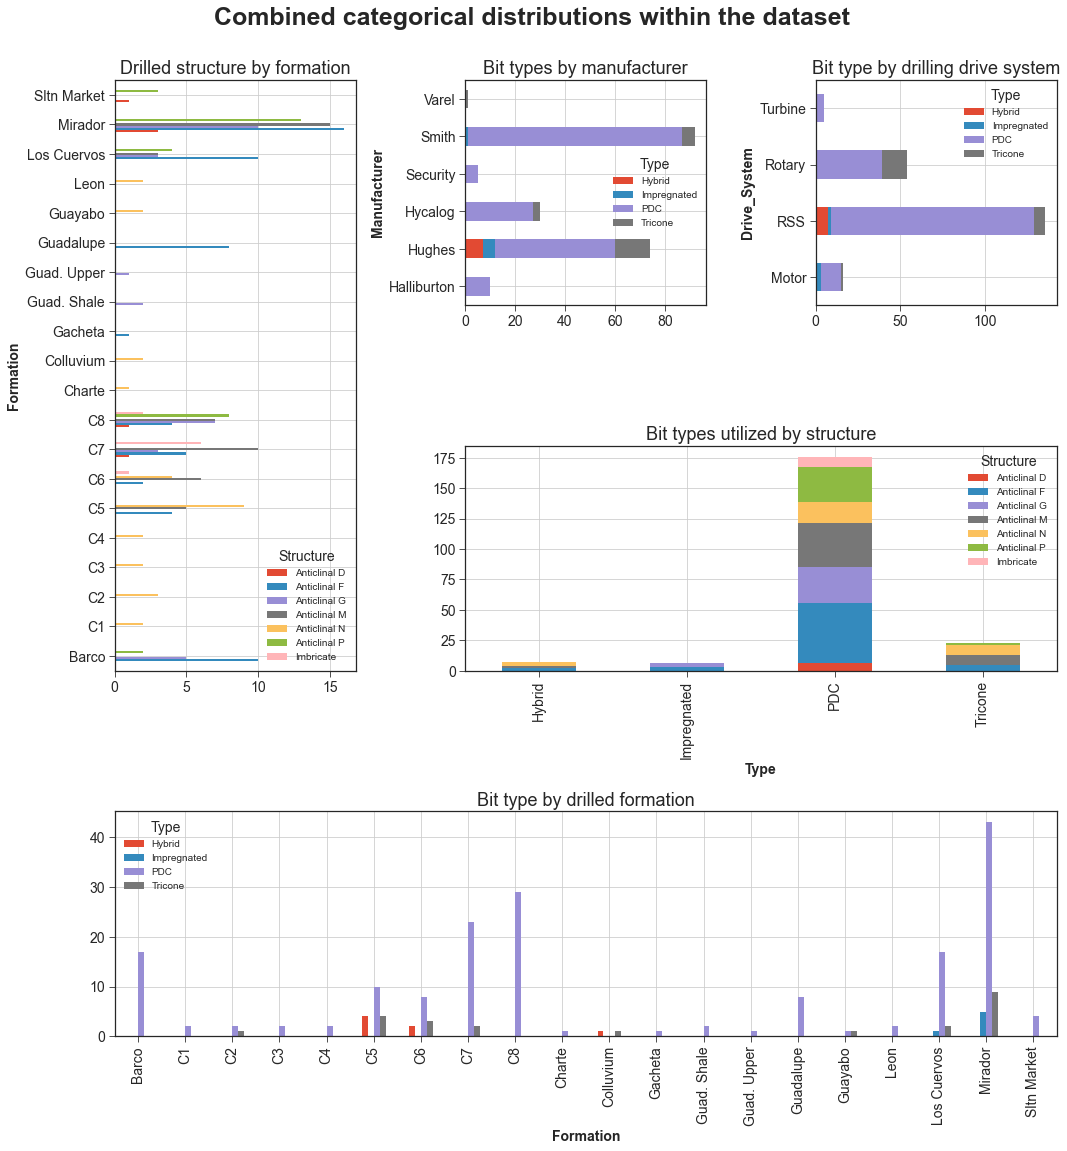

In [12]:
# Creating the pivot tables for combined cat plotting
bits_manufacturer=pd.DataFrame(Data.groupby(['Manufacturer', 'Type']).size(), columns=['Manufacturer', 'Type','Count']
                              ).pivot('Manufacturer', 'Type','Count')
type_structure=pd.DataFrame(Data.groupby(['Type', 'Structure']).size(), columns=['Type', 'Structure','Count']
                           ).pivot('Type', 'Structure','Count'))
formation_type=pd.DataFrame(Data.groupby(['Formation', 'Type']).size(), columns=["Formation", "Type",'Count']
                           ).pivot("Formation", "Type",'Count')
dds_type=pd.DataFrame(Data.groupby(['Drive_System', 'Type']). size(),columns=['Drive_System', 'Type','Count']
                     ).pivot('Drive_System', 'Type','Count')
structure_formation=pd.DataFrame(Data.groupby(['Structure', 'Formation']).size(), columns=['Structure', 'Formation','Count']
                                ).pivot('Structure', 'Formation','Count')

# Plotting with a custom function
Multi_plot(figsize=(15,16), grid=(3, 3),suptitle=('Combined categorical distributions within the dataset'),
          Axes=[[0, 0], [0, 1], [1, 1:3], [2, 0:3], [0:2, 0]],
          Titles=['Bit types by manufacturer', "Bit type by drilling drive system", "Bit types utilized by structure"
                 "Bit type by drilled formation", "Drilled structure by formation"],
          Plot_types=["barh", "barh",  "bar", "bar","barh"],
          Data=[bits_manufacturer, type_structure, formation_type, dds_type, structure_formation])

That's a lot of information:
- First interesting point, although the Smith bit is the most used, **Hughes** has more interesting variability in the types provided and in fact both **Impregnated** and **Hybrid** tools are provided by them.
- The **RSS** is used for all bit types, but the **Hybrid** tool is only coupled to it.
- The *Structure* notations are still abstract but it is interesting to see that the **Imbricate** have been dealt with using only the PDC, I wonder why, moreover we can see that these are mainly present in the C7. 
- The **Tricone** as well as the **PDC** were used in multiple formations, but the **Hybrid** type combined with the **RSS** drive system were used on the set (*C5*, *C6* and *Colluvium*). This may be related to the **pay zone** or they needed to skip these parts carefully.

___
## Continues features treatment
Numerical values are a bit trickier to deal with, outliers resulting from measurement error or human error are common. Let's get some quick statistics using the *.describe()* function.

In [20]:
Data.select_dtypes(include=np.number).describe()

,Size,Bit_Number,Footage (ft),Depth in (ft),Depth out (ft),Depth Average (ft),Blades,Cutter size (mm),Min Flow Rate (gpm),Max Flow Rate (gpm),TFA (sq in),HSI,Min WOB (klb),Max WOB (klb),Average_ROP,Mud Weight (ppg),Min_RPM,Max_RPM,Torque Max (kft-lb),Torque Min (kft-lb)
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,186.000000,181.000000,211.000000,211.000000,212.000000,211.000000,211.000000,211.000000,210.000000,212.000000,211.000000,211.000000,198.000000,198.000000
mean,12.620873,15.212264,328.221698,10998.235849,11729.985849,11364.110849,7.473118,15.585635,577.208531,650.137441,1.087340,1.500269,9.642180,33.758294,12.490619,10.031604,92.720379,142.184834,13.827576,8.052929
std,6.326351,9.553900,442.157210,5729.786745,5368.959650,5538.463620,1.807440,2.871239,263.693300,258.185233,0.471216,1.230727,11.276658,15.871984,13.076630,1.403361,47.505614,84.273867,3.940273,3.744083
min,4.125000,1.000000,0.000000,45.000000,130.000000,87.500000,3.000000,5.000000,0.000000,106.000000,0.464000,0.001451,0.000000,4.000000,0.000000,8.200000,0.000000,48.000000,5.000000,2.000000
25%,8.500000,6.750000,65.500000,6513.250000,7642.000000,7138.000000,6.000000,13.000000,276.000000,465.000000,0.778000,0.510000,3.000000,22.000000,4.012500,8.900000,70.000000,120.000000,11.000000,5.000000
50%,10.625000,15.000000,174.500000,12330.000000,12828.500000,12564.000000,7.000000,16.000000,600.000000,650.000000,0.994000,1.200000,5.000000,32.000000,7.350000,9.800000,85.000000,140.000000,13.000000,8.000000
75%,14.750000,23.000000,348.250000,15411.500000,15830.750000,15565.875000,8.000000,19.000000,840.000000,900.000000,1.199000,1.955000,10.000000,45.000000,15.725000,11.000000,110.000000,150.000000,16.000000,10.000000
max,36.000000,35.000000,2593.000000,20257.000000,20300.000000,20278.500000,18.000000,19.000000,940.000000,1050.000000,4.712000,5.600000,60.000000,78.000000,60.190000,13.600000,296.000000,1231.000000,25.000000,17.000000


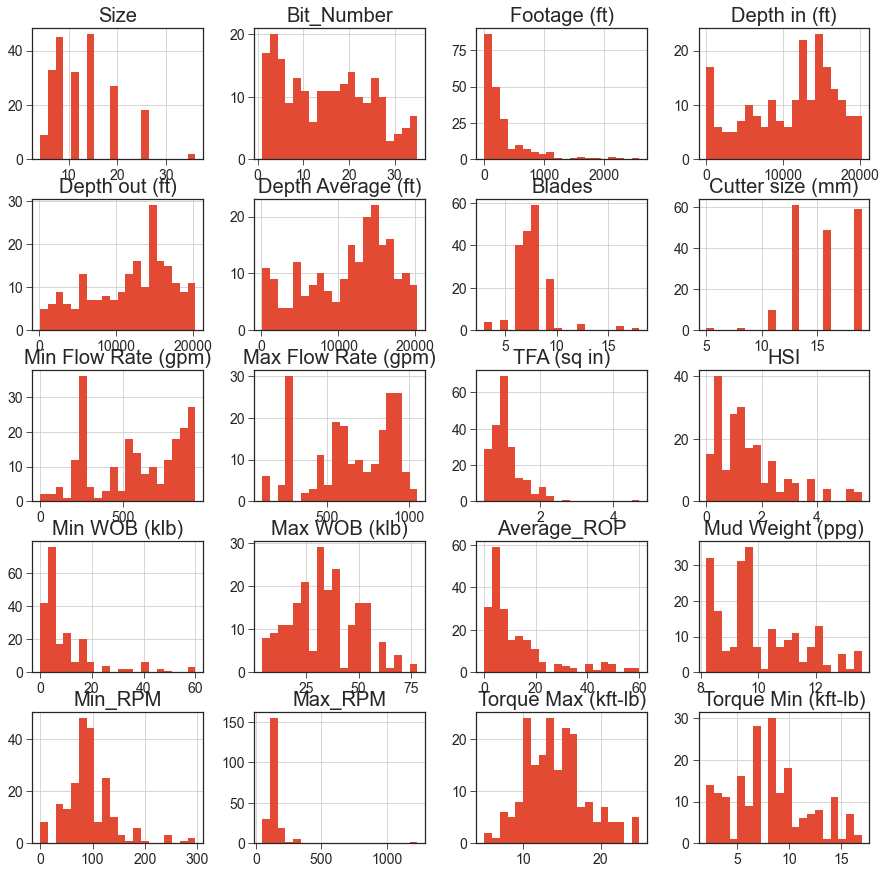

In [21]:
Multi_hist(Data, columns=4, color='red')

In [22]:
('box_'*4).split('_')

['box', 'box', 'box', 'box', '']

Most of the parameters look pretty normal (**individually**) except for the **Max_RPM**. Above 1000 is a bit odd, even a combined *Motor RPM* and *Surface RPM* wouldn't reach that number, but we'll deal with that later.

Let's take a closer look at the variations with the box plots. Keep in mind that we have not yet broken down the variation for each type of bit respectively.

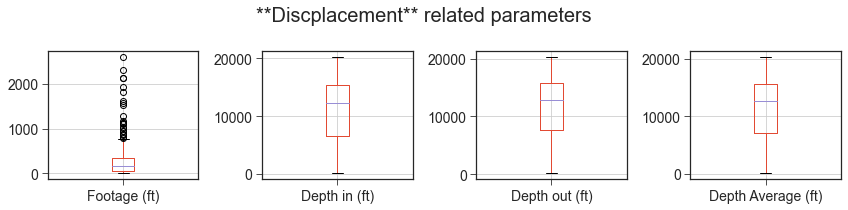

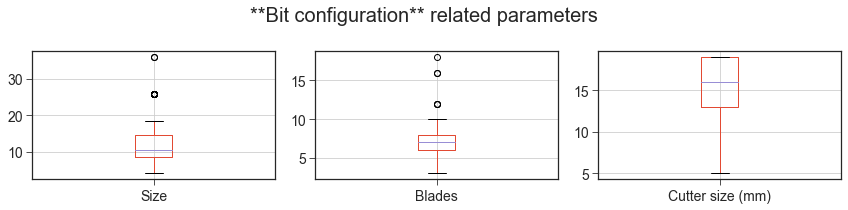

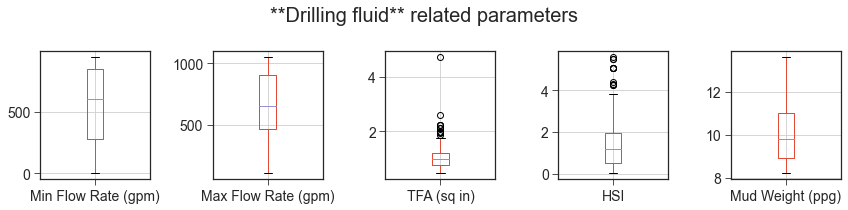

In [22]:
# Plotting with a custom function
Multi_plot(figsize=(12,3), grid=(1, 4),suptitle=('**Discplacement** related parameters'),
          Axes=[[0, 0], [0, 1], [0, 2], [0, 3]],
          Plot_types=('box_'*4).split('_')[:-2],
          Data=[Data['Footage (ft)'],Data['Depth in (ft)'],
                Data['Depth out (ft)'], Data['Depth Average (ft)']])
Multi_plot(figsize=(12,3), grid=(1, 3),suptitle=('**Bit configuration** related parameters'),
          Axes=[[0, 0], [0, 1], [0, 2]],
          Plot_types=('box_'*3).split('_')[:-2],
          Data=[Data['Size'],Data['Blades'],Data['Cutter size (mm)']])
Multi_plot(figsize=(12,3), grid=(1, 5),suptitle=('**Drilling fluid** related parameters'),
          Axes=[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4]],
          Plot_types=('box_'*5).split('_')[:-2],
          Data=[Data['Min Flow Rate (gpm)'],Data['Max Flow Rate (gpm)'],
                Data['TFA (sq in)'],Data['HSI'],Data['Mud Weight (ppg)']])

The range of *mud weight (ppg)* is certainly interesting, there seems to have been some caution regarding fluid loss associated with relatively unconsolidated formations.

Let's investigate the applied parameters seperatly.

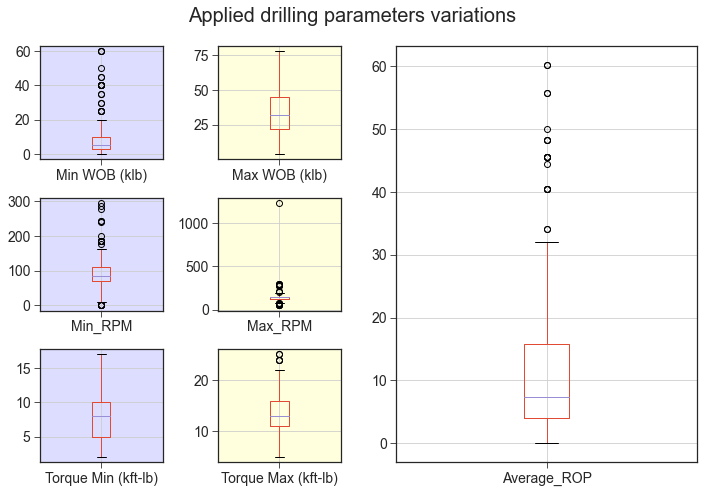

In [23]:
# Plotting with a custom function
Multi_plot(figsize=(10,7), grid=(3, 4),suptitle=('Applied drilling parameters variations'),
          Axes=[[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1], [0:3, 2:4]]
          Plot_types=('box_'*7).split('_')[:-2],
          bg_color=["#ddddff","#ffffdd","#ddddff","#ffffdd", "#ddddff","#ffffdd", 'white']
          Data=[Data['Min WOB (klb)'], Data['Max WOB (klb)'], Data['Min_RPM'],
               Data['Max_RPM'], Data['Torque Min (kft-lb)'], Data['Torque Max (kft-lb)'],
               Data['Average_ROP']])

The range of variation within each parameter is certainly large and this is primarily a result of the combined drilling grades and the drilling drive system with which they have been associated.
So to have better clarity let's investigate these bad boys by each wait for it... Bit types and the manufacturer! **(This is probably the end of my carrer, before I even begin it)**

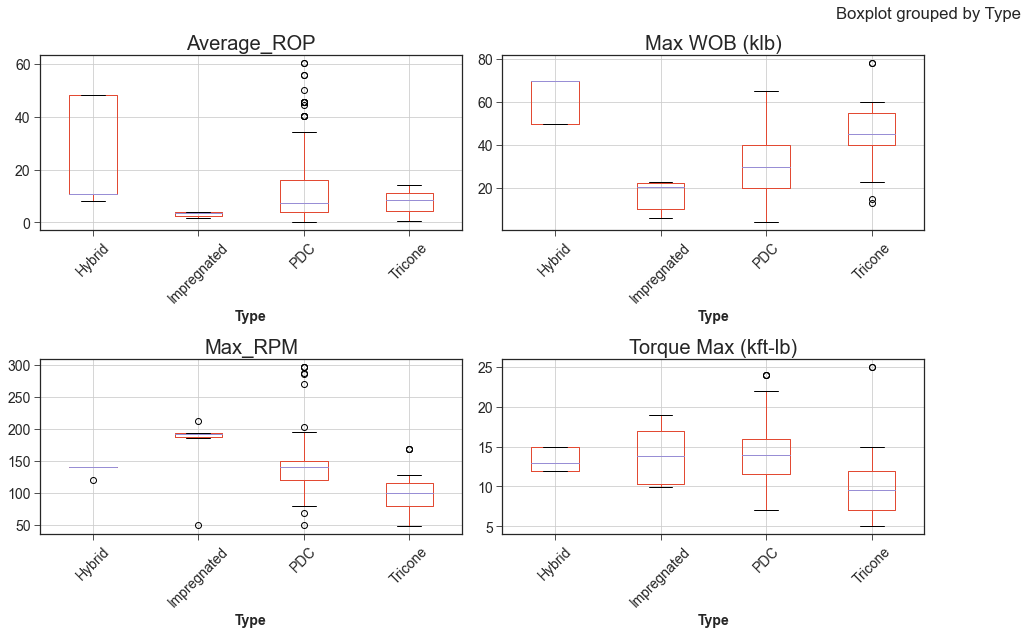

In [48]:
Multi_plot(figsize=(26,12), grid=(3, 4),
          Axes=[[0, 0], [0, 1], [1, 0], [1, 1]]
          Plot_types=('box_'*4).split('_')[:-2],
          Data=[Data['Average_ROP'], Data['Max WOB (klb)'], 
                Data['Max_RPM'], Data['Torque Max (kft-lb)']],
          By='Type')

Now that's some good insights, *PDC*'s do have the rate of penetration performance, despite applying higher Weights on other tools such as the *Tricone*, Impregnated tools in other hand rave a low rate of penetration because that allows better core capture.

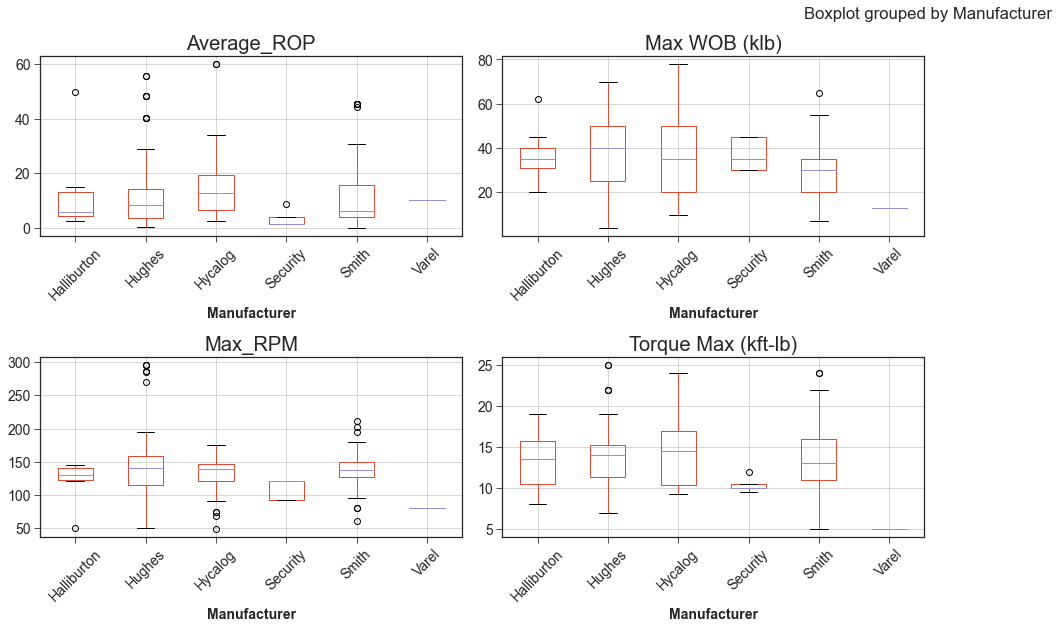

In [50]:
Multi_plot(figsize=(26,12), grid=(3, 4),
          Axes=[[0, 0], [0, 1], [1, 0], [1, 1]]
          Plot_types=('box_'*4).split('_')[:-2],
          Data=[Data['Average_ROP'], Data['Max WOB (klb)'], 
                Data['Max_RPM'], Data['Torque Max (kft-lb)']],
          By='Manufacturer')

*(Thank God!)* I mean the penetration rate performance is more or less same in respect to the applied parameters. We can still break this down later on combining the Manufacturer-Type-Footing and finaly the dull grading, and we'll do this in the interactive visuals.

___
### Dealing with the missing values
The code below represent an ensamble of treatments in case of inconsitence entries or totaly missing data points, each aspect has been dealt with in a specific manner but the methodology is the same. we identify the missing or erroness value, we identify the common ground with the rest of the parameters being the *Manufacurer* or the *Type of bit*, and when ever it's permitted we fill the blanks other wise we drop the instance completly.

In other cases, such as the *Number of cutters* and *size* we simply browse companies catalogs and try to correlate it with our own parameters just as a QC.

The code below represents a set of treatments in case of inconsistent entries or totally missing data points, each aspect has been treated in a specific way but the methodology is the same. We identify the missing value, identify the commonality with the rest of the parameters such as *Manufacturer* or *Type*, and when possible fill in the blanks, otherwise we drop the instance completely.

In other cases, such as *number of cutting tools* and *size*, we simply browse the companies' catalogs and try to correlate it with our own parameters, as a quality control.

Let's visualize the number of missing value for each parameter.

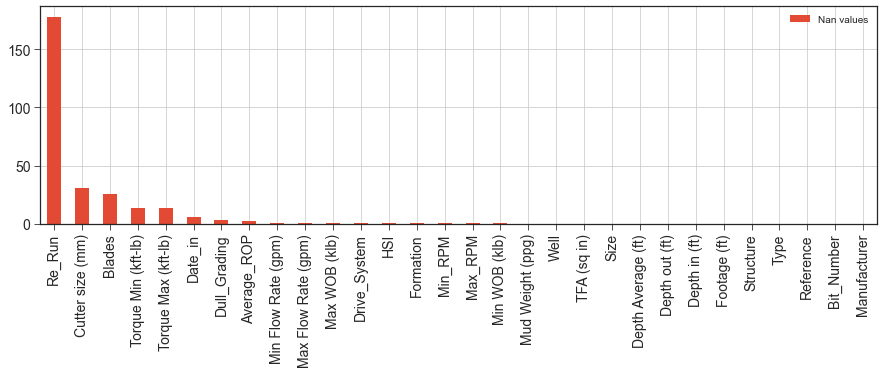

In [23]:
# Let's find the missing values
missing_values=pd.DataFrame(Data.isnull().sum(), columns=['Nan values']).sort_values(by='Nan values', ascending=False)
missing_values.plot.bar(figsize=(15,4), grid=True)
plt.show()

Well that is certainly a lot, but ain't afraid of no **ghosts**. *I hope you got the reference ;)*

In [24]:
# looking up the missing data
Data.loc[(Data.Formation.isnull())]

# Simply enough the missing 'Re_Run' points refer to newly brought bits so we're gonna put an N there for new.
Data.loc[:,"Re_Run"]=Data.loc[:,"Re_Run"].fillna("N")

# Filling the 'Formation' gap, we looked at similarities with other data points
Data.loc[(Data['Depth in (ft)']<20000) & (Data['Depth in (ft)']>16000) & 
         (Data['Structure']=='Anticlinal G')
        ][['Well','Structure', 'Formation', 
           'Footage (ft)', 'Depth in (ft)', 'Depth out (ft)']]
Data.loc[:,"Formation"]=Data.loc[:,"Formation"].fillna("Barco") # Barco was the most similar

# Let's see which bit types lack 'Blades' number info
Data.loc[(Data.Blades).isnull(),'Type'].value_counts()
# Hybrid just like Tricone have 3 blades
Data.loc[(Data.Type=='Hybrid') & (Data.Blades.isnull()), 'Blades']=3
Data.loc[(Data.Type=='Tricone') & (Data.Blades.isnull()), 'Blades']=3


# Treating cutter size
Data.loc[(Data['Cutter size (mm)']).isnull()][['Size', 'Manufacturer',
                                               'Type','Depth in (ft)', 'Depth out (ft)', 
                                               'Depth Average (ft)', 
                                               'Blades', 'Cutter size (mm)']
                                             ].sort_values(by=['Manufacturer', 'Type'], ascending=True)


# coi is a list of parameters that is more related to the aspect
# So it will change accordingly the latter
coi=['Size', 'Manufacturer','Type','Depth in (ft)', 
     'Depth out (ft)', 'Depth Average (ft)', 'Blades', 'Cutter size (mm)']
# Tricone (Done)
Data.loc[(Data.Manufacturer=='Hughes') & (Data.Type=='Tricone')][coi]
Data.loc[(Data.Manufacturer=='Smith') & (Data.Type=='Tricone')][coi] 
Data.loc[(Data.Manufacturer=='Hycalog') & (Data.Type=='Tricone')][coi] 
Data.loc[(Data.Manufacturer=='Varel') & (Data.Type=='Tricone')][coi] 
Data.loc[(Data.Type=='Tricone') & (Data['Cutter size (mm)']).isnull(), 'Cutter size (mm)']=0
# Hybrid (Done)
Data.loc[(Data.Manufacturer=='Hughes') & (Data.Type=='Hybrid')][coi]
Data.loc[(Data.Manufacturer=='Hughes') & (Data.Type=='Hybrid') &
         (Data['Cutter size (mm)'].isnull()), 'Cutter size (mm)']=16
# Impregnated (Done)
Data.loc[(Data.Type=='Impregnated')][coi]
Data.loc[(Data.Manufacturer=='Hughes') & (Data.Type=='Impregnated') &
         (Data['Cutter size (mm)']).isnull(), 'Cutter size (mm)']=8.0
# PDC (Done)
Data.loc[(Data.Manufacturer=='Hughes') & (Data.Type=='PDC') & (Data.Size==4.125)][coi]
Data.loc[(Data.Manufacturer=='Hughes') & (Data.Type=='PDC') & (Data.Blades==8.0)][coi]
Data.loc[(Data.Manufacturer=='Hughes') & (Data.Type=='PDC') & (Data.Blades==8.0) &
         (Data['Cutter size (mm)']).isnull(), 'Cutter size (mm)']=11
Data.loc[(Data['Cutter size (mm)']).isnull(), 'Cutter size (mm)'].sum()


# Treating the torque 'Torque Max (kft-lb)', 'Torque Min (kft-lb)'
# For these we are averaging the values in respect to 'Manufacturer'
# and 'Bit Type'
coi=['Size', 'Manufacturer','Type','Depth in (ft)', 'Depth out (ft)', 
     'Depth Average (ft)', 'Blades', 'Cutter size (mm)',
     'Torque Max (kft-lb)', 'Torque Min (kft-lb)']
Data.loc[(Data['Torque Max (kft-lb)']).isnull()][coi]
Data.loc[(Data['Manufacturer']=='Hycalog') & (Data['Type']=='Tricone'), 'Torque Max (kft-lb)'] # None
Data.loc[(Data['Type']=='Tricone'), 'Torque Max (kft-lb)'].mean() # 11
Data.loc[(Data['Manufacturer']=='Hycalog') & (Data['Type']=='Tricone') &
         (Data['Torque Max (kft-lb)'].isnull()), 'Torque Max (kft-lb)']=11
Data.loc[(Data['Manufacturer']=='Hycalog') & (Data['Type']=='PDC'), 'Torque Max (kft-lb)'] # 15
Data.loc[(Data['Manufacturer']=='Hycalog') & (Data['Type']=='PDC') &
         (Data['Torque Max (kft-lb)'].isnull()), 'Torque Max (kft-lb)']=15
Data.loc[(Data['Manufacturer']=='Hughes') & (Data['Type']=='Tricone'), 'Torque Max (kft-lb)'].mean() # 13
Data.loc[(Data['Manufacturer']=='Hughes') & 
         (Data['Type']=='Tricone') & (Data['Torque Max (kft-lb)'].isnull()), 'Torque Max (kft-lb)']=13
Data.loc[(Data['Manufacturer']=='Hughes') & 
         (Data['Type']=='PDC'), 'Torque Max (kft-lb)'].mean() # 14
Data.loc[(Data['Manufacturer']=='Hughes') & 
         (Data['Type']=='PDC') & (Data['Torque Max (kft-lb)'].isnull()), 'Torque Max (kft-lb)']=14
Data.loc[(Data['Manufacturer']=='Smith') & 
         (Data['Type']=='Tricone'), 'Torque Max (kft-lb)'].mean() # 7
Data.loc[(Data['Manufacturer']=='Smith') & 
         (Data['Type']=='Tricone') & (Data['Torque Max (kft-lb)'].isnull()), 'Torque Max (kft-lb)']=7
Data.loc[(Data['Manufacturer']=='Smith') & 
         (Data['Type']=='PDC'), 'Torque Max (kft-lb)'].mean() # 14
Data.loc[(Data['Manufacturer']=='Smith') & 
         (Data['Type']=='PDC') & (Data['Torque Max (kft-lb)'].isnull()), 'Torque Max (kft-lb)']=14

# Same goes for the min torque
Data.loc[(Data['Torque Min (kft-lb)']).isnull()][coi]
Data.loc[(Data['Manufacturer']=='Hycalog') & (Data['Type']=='Tricone'), 'Torque Min (kft-lb)'] # None
Data.loc[(Data['Type']=='Tricone'), 'Torque Min (kft-lb)'].mean() # 5
Data.loc[(Data['Manufacturer']=='Hycalog') & (Data['Type']=='Tricone') &
         (Data['Torque Min (kft-lb)'].isnull()), 'Torque Min (kft-lb)']=5
Data.loc[(Data['Manufacturer']=='Hycalog') & (Data['Type']=='PDC'), 'Torque Min (kft-lb)'].mean() # 8
Data.loc[(Data['Manufacturer']=='Hycalog') & (Data['Type']=='PDC') & 
         (Data['Torque Min (kft-lb)'].isnull()), 'Torque Min (kft-lb)']=8

Data.loc[(Data['Manufacturer']=='Hughes') & (Data['Type']=='Tricone'), 'Torque Min (kft-lb)'].mean() # 6
Data.loc[(Data['Manufacturer']=='Hughes') & (Data['Type']=='Tricone') &
         (Data['Torque Min (kft-lb)'].isnull()), 'Torque Min (kft-lb)']=6

Data.loc[(Data['Manufacturer']=='Hughes') & (Data['Type']=='PDC'), 'Torque Min (kft-lb)'].mean() # 10
Data.loc[(Data['Manufacturer']=='Hughes') & (Data['Type']=='PDC') & 
         (Data['Torque Min (kft-lb)'].isnull()), 'Torque Min (kft-lb)']=10

Data.loc[(Data['Manufacturer']=='Smith') & (Data['Type']=='Tricone'), 'Torque Min (kft-lb)'].mean() # 4
Data.loc[(Data['Manufacturer']=='Smith') & (Data['Type']=='Tricone') & 
         (Data['Torque Min (kft-lb)'].isnull()), 'Torque Min (kft-lb)']=4

Data.loc[(Data['Manufacturer']=='Smith') & (Data['Type']=='PDC'), 'Torque Min (kft-lb)'].mean() # 8
Data.loc[(Data['Manufacturer']=='Smith') & (Data['Type']=='PDC') & (Data['Torque Min (kft-lb)'].isnull()), 'Torque Min (kft-lb)']=8

Data.loc[(Data['Torque Min (kft-lb)']).isnull()][coi]


# Treating Average ROP
coi=['Size', 'Manufacturer','Type','Depth in (ft)', 'Depth out (ft)',
     'Depth Average (ft)', 'Blades', 'Cutter size (mm)', 'Average_ROP']
Data.loc[(Data['Average_ROP']).isnull()][coi]

Data.loc[(Data['Manufacturer']=='Smith') & (Data['Type']=='PDC'), 'Average_ROP'].mean() # 12
Data.loc[(Data['Manufacturer']=='Hycalog') & (Data['Type']=='PDC'), 'Average_ROP'].mean() # 17
Data.loc[(Data['Manufacturer']=='Smith') & (Data['Type']=='PDC') & (Data['Average_ROP'].isnull()), 'Average_ROP']=12
Data.loc[(Data['Manufacturer']=='Hycalog') & (Data['Type']=='PDC') & (Data['Average_ROP'].isnull()), 'Average_ROP']=17

# Treating 'Min Flow Rate (gpm)', 'Max Flow Rate (gpm)', 'HSI', 'Min WOB (klb)', 'Max WOB (klb)'
# Min_RPM, Max_RPM, Drive_System
coi=['Size', 'Manufacturer','Type', 'Min Flow Rate (gpm)', 'Depth Average (ft)', 'Blades', 'Cutter size (mm)', 'Average_ROP']
Data.loc[(Data['Min Flow Rate (gpm)']).isnull()][coi]
Data.loc[(Data['Manufacturer']=='Smith') & (Data['Type']=='PDC'), 'Min Flow Rate (gpm)'].mean() # 520
Data.loc[(Data['Manufacturer']=='Smith') & (Data['Type']=='PDC') & (Data['Min Flow Rate (gpm)'].isnull()), 'Min Flow Rate (gpm)']=520

coi=['Size', 'Manufacturer','Type', 'Max Flow Rate (gpm)', 'Depth Average (ft)', 'Blades', 'Cutter size (mm)', 'Average_ROP']
Data.loc[(Data['Max Flow Rate (gpm)']).isnull()][coi]
Data.loc[(Data['Manufacturer']=='Smith') & (Data['Type']=='PDC'), 'Max Flow Rate (gpm)'].mean() # 595
Data.loc[(Data['Manufacturer']=='Smith') & (Data['Type']=='PDC') &
         (Data['Max Flow Rate (gpm)'].isnull()), 'Max Flow Rate (gpm)']=595

coi=['Size', 'Manufacturer','Type', 'HSI', 'Depth Average (ft)', 'Blades', 'Cutter size (mm)', 'Average_ROP']
Data.loc[(Data['HSI']).isnull()][coi]
Data.loc[(Data['Manufacturer']=='Hycalog') & (Data['Type']=='PDC'), 'HSI'].mean() # 1.2
Data.loc[(Data['Manufacturer']=='Hycalog') & (Data['Type']=='PDC') & (Data['HSI'].isnull()), 'HSI']=1.2

coi=['Size', 'Manufacturer','Type', 'Min_RPM', 'Max_RPM', 'Depth Average (ft)', 'Blades', 'Cutter size (mm)', 'Average_ROP']
Data.loc[(Data['Min_RPM']).isnull()][coi]
Data.loc[(Data['Manufacturer']=='Smith') & (Data['Type']=='PDC'), 'Min_RPM'].mean() # 91
Data.loc[(Data['Manufacturer']=='Smith') & (Data['Type']=='PDC') & (Data['Min_RPM'].isnull()), 'Min_RPM']=91
Data.loc[(Data['Max_RPM']).isnull()][coi]
Data.loc[(Data['Manufacturer']=='Smith') & (Data['Type']=='PDC'), 'Max_RPM'].mean() # 151
Data.loc[(Data['Manufacturer']=='Smith') & (Data['Type']=='PDC') & (Data['Max_RPM'].isnull()), 'Max_RPM']=151

# The row 167 has various missing data, filling it with mean values 
# is none feasable since there has been no drilling with it
Data.drop(167 ,inplace=True)
Data.reset_index(inplace=True)
Data.drop('index', axis=1, inplace=True)

# Treating Dull grading
coi=['Manufacturer', 'Type', 'Size', 'Well', 'Re_Run', 'Formation', 'Structure', 'Footage (ft)', 'Depth in (ft)',
     'Depth out (ft)', 'Min Flow Rate (gpm)', 'Max Flow Rate (gpm)', 'Min WOB (klb)', 'Max WOB (klb)', 'Dull_Grading', 
     'Drive_System', 'Min_RPM', 'Max_RPM', 'Torque Max (kft-lb)', 'Torque Min (kft-lb)']

Data.loc[(Data['Dull_Grading']).isnull()][coi]
Data.loc[(Data.Manufacturer=='Hughes') & (Data.Type=='Impregnated')][coi]
Data.loc[(Data.Manufacturer=='Hycalog') & (Data.Type=='Tricone')][coi]


# Dropping a couple corrupted rows identified upon investigation
Data.drop([1, 104, 105] ,inplace=True)
Data.reset_index(inplace=True)
Data.drop('index', axis=1, inplace=True)

Data.drop([179,180,181] ,inplace=True)
Data.reset_index(inplace=True)
Data.drop('index', axis=1, inplace=True)

# There is no necessity for Data_in regarding our analysis
# Especially that there is no Date_out
Data.drop('Date_in', axis=1 ,inplace=True)
Data.reset_index(inplace=True)
Data.drop('index', axis=1, inplace=True)

And TADA! we're done with the missing values, frankly the methodology was simple there are a lot more advanced technics but since the number of categories and data points are relatively low *(200x30)*, I prefered to deal manualy with them.

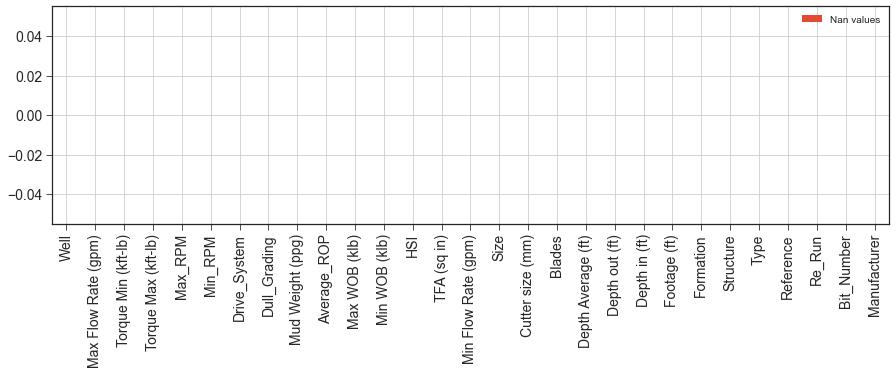

In [25]:
# Let's find the missing values
missing_values=pd.DataFrame(Data.isnull().sum(), columns=['Nan values']).sort_values(by='Nan values', ascending=False)
missing_values.plot.bar(figsize=(15,4), grid=True)
plt.show()

___
## 3. What is drilling bit dulling? and how is it quanified? 
Drilling bits indepandantly of the matter they been made of or their design have a certain life span which correlates highly to how and where they been used. Consistently being pushhed to theirs limits, under extreme conditions of stress, friction and heat. They will evantually fail some way or another.

## 4. How do we quantify drill bit dulling?
The **IADC Dull Grading** is a standard system to quantify the Dull/Wear of each specific part of the tool. And each tool has it's own 'IADC DGS'. The later system since it serves to assess it can also be used to improve future bit selection.

As an example for the *PDC* bit type, the report represent a table with 8 distinguished columns, *4* dedicated to *Cutting Structure*, *1* for Bearing, *1* for *Gauge* and last *2* for *Remarks. In general case is represents something simular to this.

| Inner Rows - Average Cutter Wear | Outer Rows - Average Cutter Wear | Primary Dull Characteristic | Location of Primary Dull Characteristic | Bearing & Seals | Gauge | Other Dull Characteristic | Reason Pulled |
|:----------|:------------|:----------|:------------|:----------|:------------|:----------|:------------|
|2 | 3 | WT | A | F | 2 | BU | TD|


- **Inner Rows - Average Cutter Wear :** This represents the 2/3rd of the bit diameter and is quantified between (0 and 8), 0 bieng 0% dulling and 8 is 100%.
- **Outer Rows - Average Cutter Wear :** This represents the remaining 1/3rd of the bit diameter and is quantified between (0 and 8), 0 bieng 0% dulling and 8 is 100%.
- **Primary Dull Characteristic :** Is represented by a code that indicates the main dulling status, including : (BF : Bond, Failure, BT : Broken Cutter, CT : Chipped Cutter, ER : Erosion, FC : Flat Crested Wear ,HC : Heat Checking, LT : Lost Cutter, NO : No Characteristics, RG : Rounded Gauge, WT : Worn Cutters)
- **Location of Primary Dull Characteristic :** C : Cone, N : Nose, S : Shoulder, T : Taper, G : Gauge
- **Bearing & Seals :** *X* in the case of a fixed cutter drilling bit.
- **Gauge :** Either *I* for In-gauge, or a value (1/16 - 16/16)
- **Other Dull Characteristic :** A comment about a secondary dulling characteristic, may includ the following: (BU : Balled Up, CR : Cored, JD : Junk Damage, LN : Lost Nozzle, NR : Not Rerunnable, PN : Plugged Nozzle, RO : Ring Out, RR : Rerunnable, WO : Wash out)
- **Reason Pulled :** The main reason why the drill bit has been pulled out of the well, which includes (BHA : Changed Bottom Hole Assembly, DHM : Downhole Motor Failure, DSF : Drill String Failure, DST : Drill Stem Test, DHF: Downhole Tool Failure, LOG : Run Logs, RIG : Rig Repair, CM : Condition Mud, CP : Core Point, DP : Drill Plug, FC : Formation Change, HP: Hole Problems, PP : Pump Pressure, PR : Penetration Rate, TD : Total Depth, TQ : Torque, TW: Twist-Off, WC : Weather Conditions, WO : Washout Drill String.

And so this is how you can read or fill the Drilling Bit Assassement Sheet. For more info you can refer to the bit education on the IADC web site. Let's carry out our investigation of the data.

In our case the *Dull_Grading* column give us the complete bit assassement in one string such as *'1-1-WT-A-E-I-BU-PR'*, so we need to separate each value to its respective parameter. Fortunatly we can easily do it in python using the *.split()* function.

In [35]:
Dulling_columns= ['Inner Cutting Structure', 'Outer Cutting Structure', 'Dull Grading Characteristics',
                'Location', 'Bearings/Seals', 'Gauge', 'Other', 'Reason Pulled']
Dull_Grading_df= pd.DataFrame(Data.Dull_Grading.str.split('-').tolist(), columns=Dulling_columns)
Dull_Grading_df

,Inner Cutting Structure,Outer Cutting Structure,Dull Grading Characteristics,Location,Bearings/Seals,Gauge,Other,Reason Pulled
0,0,0,NO,A,E,I,NO,TD
1,1,1,WT,A,E,I,BU,PR
2,1,1,WT,A,E,I,BU,PR
3,2,3,WT,A,F,2,BU,TD
4,2,3,WT,A,F,2,BU,TD
...,...,...,...,...,...,...,...,...
200,1,2,WT,A,X,I,CT,PR
201,2,4,WT,S,X,I,BT,PR
202,8,5,RO,S,X,I,BT,PR
203,3,4,BT,A,X,I,CT,TD


Alright this is getting interesting, Let's take a quick look at the dulling aspect distribution. In other terms:
- What are the most common bit dulling?
- What are the most vulnerable location?
- What are the main reasons that drive the operators to pull out the well?

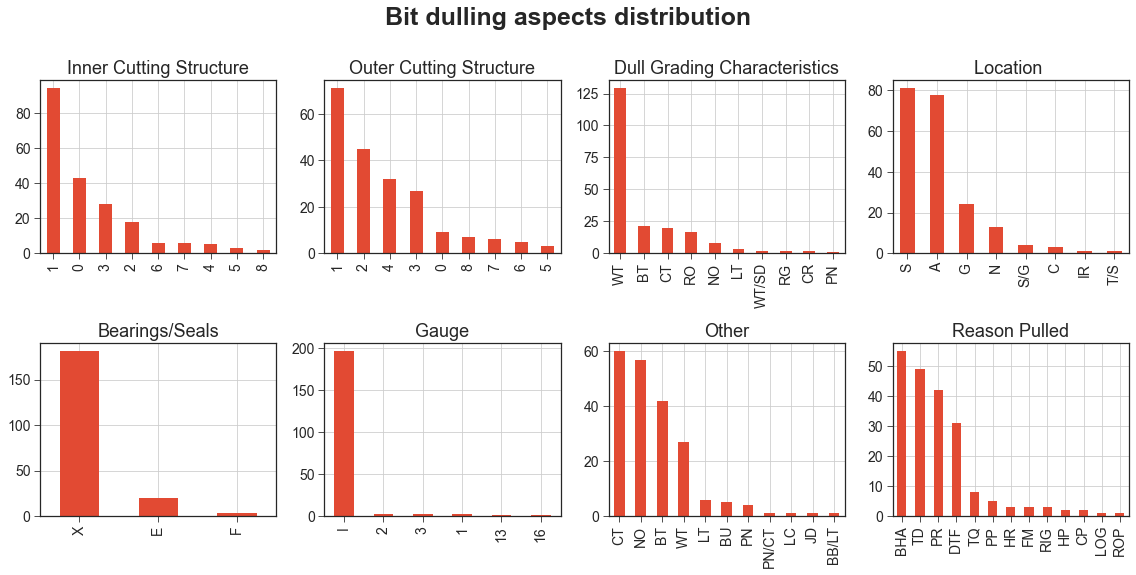

In [36]:
Multi_plot(figsize=(16,8), grid=(2, 4),suptitle=('Bit dulling aspects distribution'),
          Axes=[[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]],
          Titles=["Inner Cutting Structure", "Outer Cutting Structure", "Dull Grading Characteristics",
                 "Location", "Bearings/Seals", "Gauge", "Other", "Reason Pulled"],
          Plot_types=('bar_'*8).split('_')[:-2],
          Data=[Dull_Grading_df["Inner Cutting Structure"].value_counts()["Inner Cutting Structure"],
               Dull_Grading_df["Outer Cutting Structure"].value_counts()["Outer Cutting Structure"],
               Dull_Grading_df["Dull Grading Characteristics"].value_counts()["Dull Grading Characteristics"],
               Dull_Grading_df["Location"].value_counts()["Location"],
               Dull_Grading_df["Bearings/Seals"].value_counts()["Bearings/Seals"],
               Dull_Grading_df["Gauge"].value_counts()["Gauge"],
               Dull_Grading_df["Other"].value_counts()["Other"],
               Dull_Grading_df["Reason Pulled"].value_counts()["Reason Pulled"]])

Now that's something worth reflection:
- When it comes to **ICS** and **OCS** 80% of the distribution falls into the 3 first conditions (0, 1, 2) of course as the later becomes more aggressive the percentage decreases.
- The most common **main dulling characteristics** are *Worn, Broken and Chipped Cutters*, that is something to consider later for the model, we should *be careful of bias ;)*
- In the case of **Location**, *Shoulders* seem to be to must impacted. Probably as a result of direction which generates more side friction. That is extremally important to keep into consideration, you might think that we should reinforce that, well that's not a necessity. Why?!! Because despite that bits haven't broken down.    
- For **Bearings/Seals** X is the major one since our data is already bias towards PDC's.
- **Gauge** falls in the same case as the Bearings and Seals.
- When it comes to the **Reason Pulled** there seems to be a bit of inefficiency, Aver 60% of the time the drilling string has been pulled for *component changing*, *Insufficient penetration rate*, *important torque* and *Downhole Tool Failure*. 

Now let's go back to the fun part, we want to understand which drilling bit was the most resilient, hence let's break it to the following questions:
- What is the most commune dulling within each drilling bit type?
- What is the most commune dulling en respect to the manufacturer?
- How does the various parameters correlate with the dulling aspect?

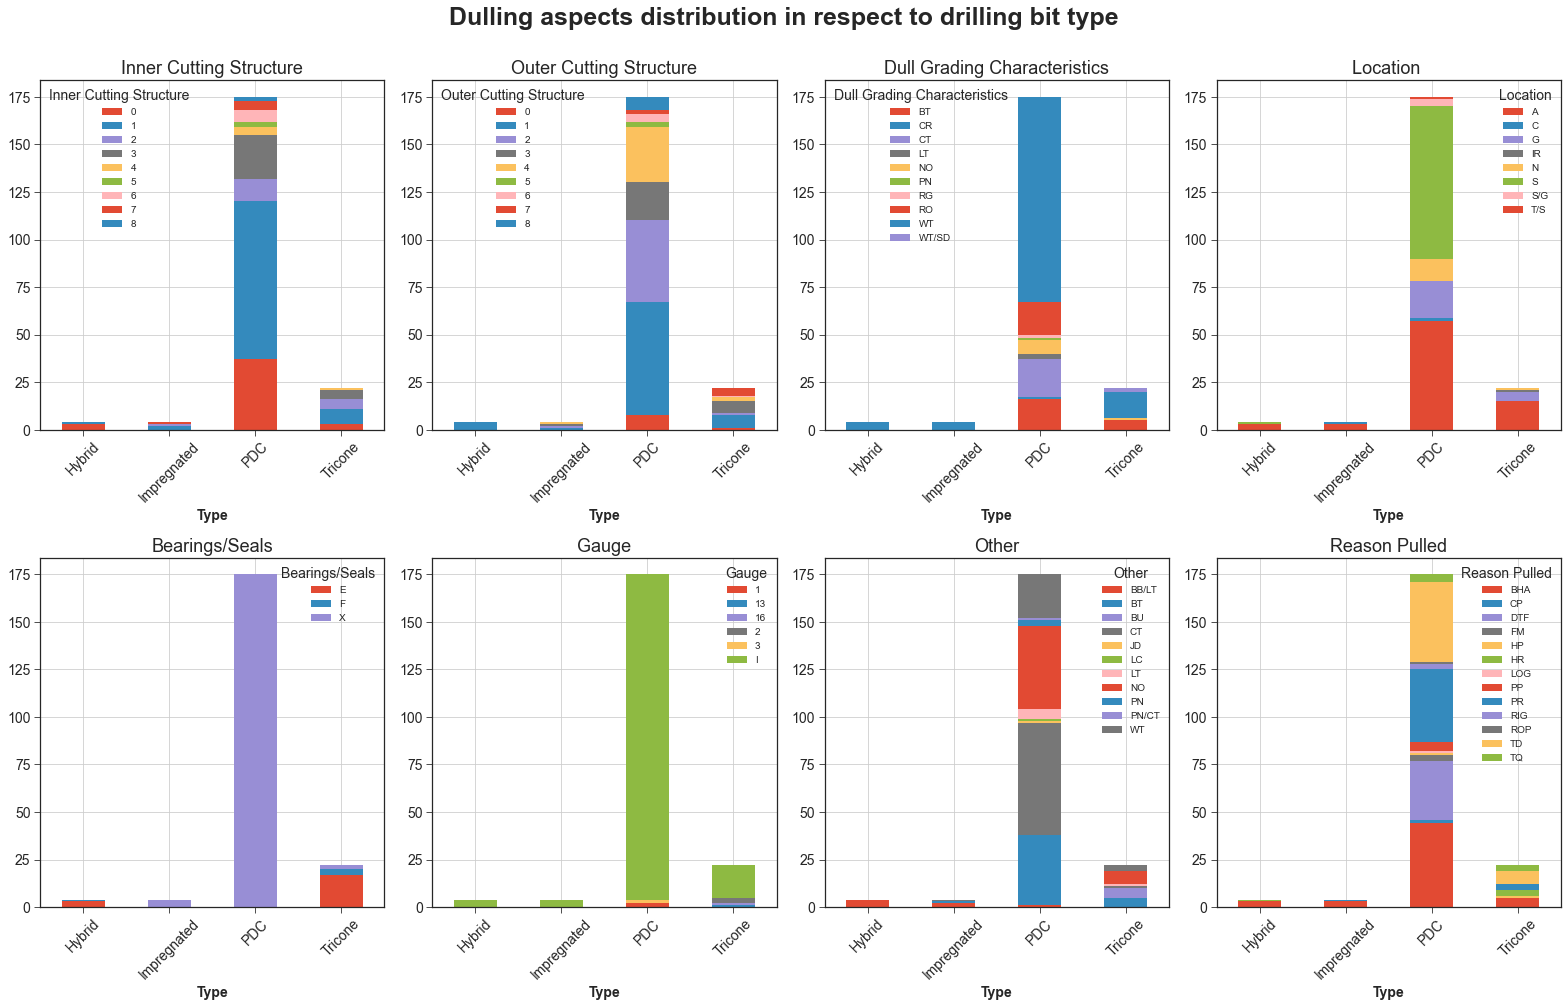

In [37]:
# Let's combine our two dataframes
Full_Data=pd.concat([Data,Dull_Grading_df],axis=1)

# Creating the pivot tables for combined cat plotting
bits_ICT=pd.DataFrame(Full_Data.groupby(['Type', 'Inner Cutting Structure']
                                       ).size(), columns=['Type', 'Inner Cutting Structure', 'Count']
                     ).pivot('Type', 'Inner Cutting Structure', 'Count')

bits_OCT=pd.DataFrame(Full_Data.groupby(['Type', 'Outer Cutting Structure']
                                       ).size(), columns=['Type', 'Outer Cutting Structure', 'Count']
                     ).pivot('Type', 'Outer Cutting Structure', 'Count')

bits_DGC=pd.DataFrame(Full_Data.groupby(['Type', 'Dull Grading Characteristics'] 
                                       ).size(), columns=['Type', 'Dull Grading Characteristics', 'Count']
                     ).pivot('Type', 'Dull Grading Characteristics', 'Count')

bits_LOC=pd.DataFrame(Full_Data.groupby(['Type', 'Location'], 
                                       ).size(), columns=['Type', 'Location', 'Count']
                     ).pivot('Type', 'Location', 'Count')

bits_BS=pd.DataFrame(Full_Data.groupby(['Type', 'Bearings/Seals']
                                      ).size(), columns=['Type', 'Bearings/Seals', 'Count']
                    ).pivot('Type', 'Bearings/Seals', 'Count')

bits_GG=pd.DataFrame(Full_Data.groupby(['Type', 'Gauge']).size(), columns=['Type', 'Gauge', 'Count']
                    ).pivot('Type', 'Gauge', 'Count')

bits_OTH=pd.DataFrame(Full_Data.groupby(['Type', 'Other']
                                       ).size(), columns=['Type', 'Other', 'Count']
                     ).pivot('Type', 'Other', 'Count')

bits_RP=pd.DataFrame(Full_Data.groupby(['Type', 'Reason Pulled']
                                      ).size(), columns=['Type', 'Reason Pulled', 'Count']
                    ).pivot('Type', 'Reason Pulled', 'Count')

# let's plot
Multi_plot(figsize=(16,8), grid=(2, 4),suptitle=('Dulling aspects distribution in respect to drilling bit type'),
          Axes=[[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]],
          Titles=["Inner Cutting Structure", "Outer Cutting Structure", "Dull Grading Characteristics",
                 "Location", "Bearings/Seals", "Gauge", "Other", "Reason Pulled"],
          Plot_types=('bar_'*8).split('_')[:-2],
          Data=[bits_ICT, bits_OCT, bits_DGC, bits_LOC, bits_BS, bits_GG, bits_OTH, bits_RP])

The main reason why the drill bit has been pulled out of the well, which includes 
(BHA : Changed Bottom Hole Assembly, DHM : Downhole Motor Failure, DSF : Drill String Failure, 
 DST : Drill Stem Test, DHF: Downhole Tool Failure, LOG : Run Logs, RIG : Rig Repair, 
 CM : Condition Mud, CP : Core Point, DP : Drill Plug, FC : Formation Change, HP: Hole Problems, 
 PP : Pump Pressure, PR : Penetration Rate, TD : Total Depth, TQ : Torque, TW: Twist-Off, 
 WC : Weather Conditions, WO : Washout Drill String.

Alright alright alright:
- It appears *PDC*'s are the most commonly pushed to theirs limits untill faillure, but doesn't mean that they are the most vulnurable to faillure and that is appearent in both *ICT* and *OCT*.
- Try to interpret the rest yourself and see if you can get any intresting insights.

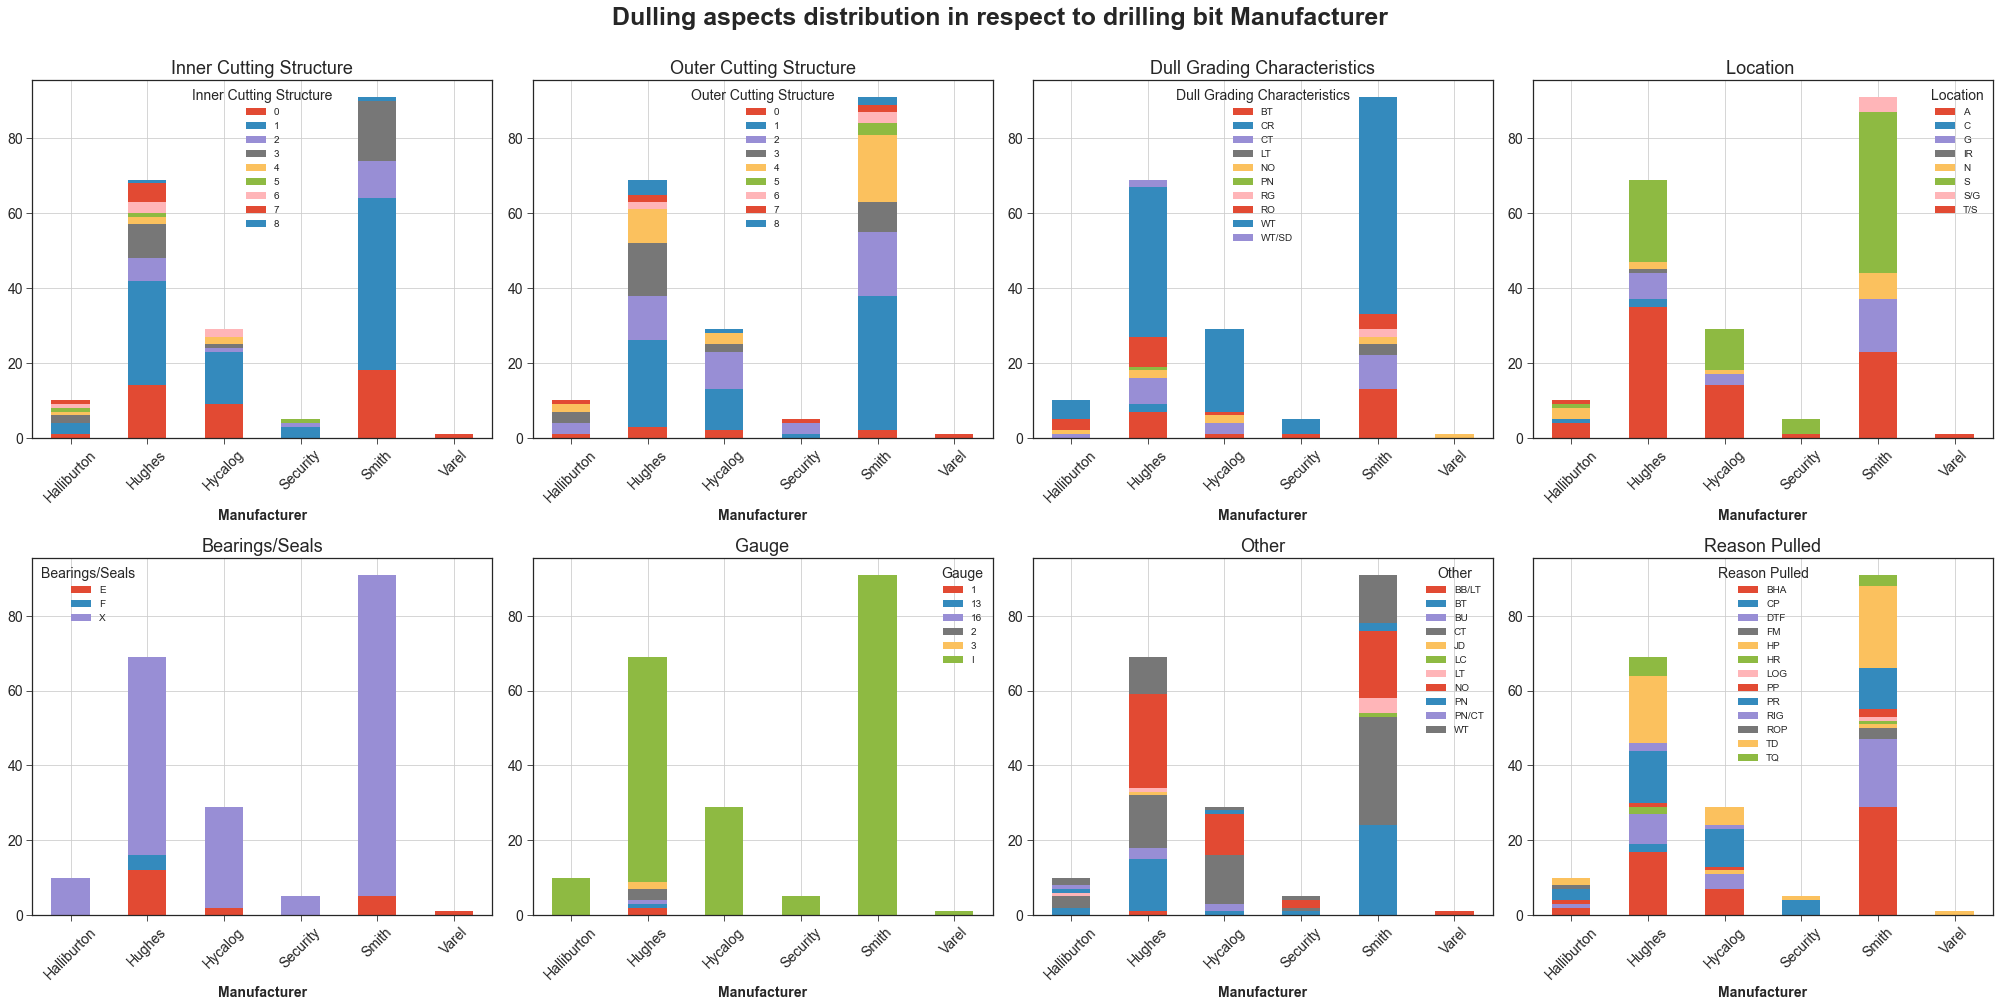

In [38]:
# Let's combine our two dataframes
Full_Data=pd.concat([Data,Dull_Grading_df],axis=1)

# Creating the pivot tables for combined cat plotting
Manufacturer_ICT=pd.DataFrame(Full_Data.groupby(['Manufacturer', 'Inner Cutting Structure']
                                       ).size(), columns=['Manufacturer', 'Inner Cutting Structure', 'Count']
                     ).pivot('Manufacturer', 'Inner Cutting Structure', 'Count')

Manufacturer_OCT=pd.DataFrame(Full_Data.groupby(['Manufacturer', 'Outer Cutting Structure']
                                       ).size(), columns=['Manufacturer', 'Outer Cutting Structure', 'Count']
                     ).pivot('Manufacturer', 'Outer Cutting Structure', 'Count')

Manufacturer_DGC=pd.DataFrame(Full_Data.groupby(['Manufacturer', 'Dull Grading Characteristics'] 
                                       ).size(), columns=['Manufacturer', 'Dull Grading Characteristics', 'Count']
                     ).pivot('Manufacturer', 'Dull Grading Characteristics', 'Count')

Manufacturer_LOC=pd.DataFrame(Full_Data.groupby(['Manufacturer', 'Location']
                                       ).size(), columns=['Manufacturer', 'Location', 'Count']
                     ).pivot('Manufacturer', 'Location', 'Count')

Manufacturer_BS=pd.DataFrame(Full_Data.groupby(['Manufacturer', 'Bearings/Seals']
                                      ).size(), columns=['Manufacturer', 'Bearings/Seals', 'Count']
                    ).pivot('Manufacturer', 'Bearings/Seals', 'Count')

Manufacturer_GG=pd.DataFrame(Full_Data.groupby(['Manufacturer', 'Gauge']).size(), columns=['Manufacturer', 'Gauge', 'Count']
                    ).pivot('Manufacturer', 'Gauge', 'Count')

Manufacturer_OTH=pd.DataFrame(Full_Data.groupby(['Manufacturer', 'Other']
                                       ).size(), columns=['Manufacturer', 'Other', 'Count']
                     ).pivot('Manufacturer', 'Other', 'Count')

Manufacturer_RP=pd.DataFrame(Full_Data.groupby(['Manufacturer', 'Reason Pulled']
                                      ).size(), columns=['Manufacturer', 'Reason Pulled', 'Count']
                    ).pivot('Manufacturer', 'Reason Pulled', 'Count')

# let's plot
Multi_plot(figsize=(16,8), grid=(2, 4),suptitle=('Dulling aspects distribution in respect to drilling bit Manufacturer'),
          Axes=[[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]],
          Titles=["Inner Cutting Structure", "Outer Cutting Structure", "Dull Grading Characteristics",
                 "Location", "Bearings/Seals", "Gauge", "Other", "Reason Pulled"],
          Plot_types=('bar_'*8).split('_')[:-2],
          Data=[Manufacturer_ICT, Manufacturer_OCT, Manufacturer_DGC, Manufacturer_LOC, 
                Manufacturer_BS, Manufacturer_GG, Manufacturer_OTH, Manufacturer_RP])

Alright companies seem to do pretty well for them selves, we need to add two additional dimensions to these plots being *Formation* and *Footage*, to be able to come up with a better insights on perfomance.

Okey, that done let's turn to the performance:
- What was the overall dynamic of the drilling parameters (WOB, RPM, Drilling Fluid)?
- What is the average penetration rate en respect to the drilling bit, the manufacturer, DDS, Structure and Formation?

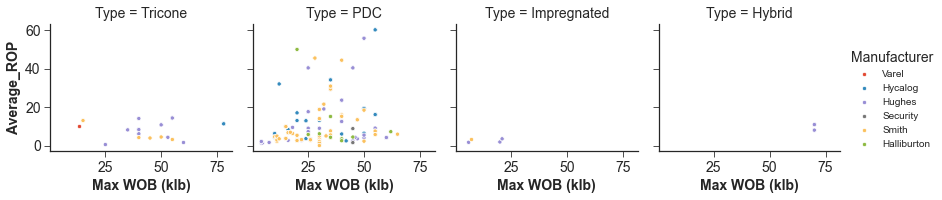

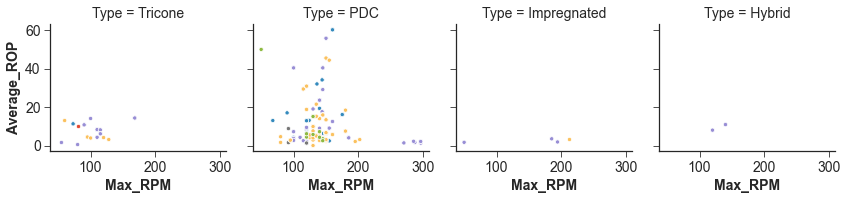

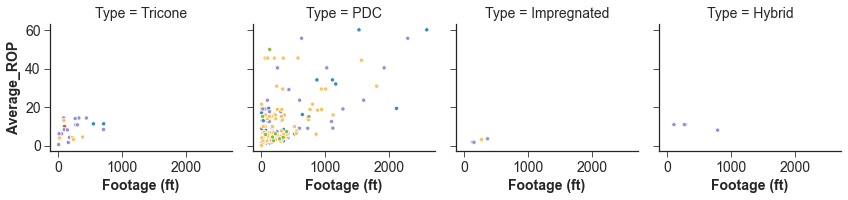

In [59]:
g = sns.FacetGrid(Data, col='Type', hue='Manufacturer', col_wrap=4)
g.map(sns.scatterplot, 'Max WOB (klb)', 'Average_ROP', size=20, marker='o')
g.add_legend()
g = sns.FacetGrid(Data, col='Type', hue='Manufacturer', col_wrap=4)
g.map(sns.scatterplot, 'Max_RPM', 'Average_ROP', size=20, marker='o')
g = sns.FacetGrid(Data, col='Type', hue='Manufacturer', col_wrap=4)
g.map(sns.scatterplot, 'Footage (ft)', 'Average_ROP', size=20, marker='o')

I love scatters, I already see a clear path within the data.
- The *Tricone* doesn't seem to perform any better independently of the *Manufacturer* or the applied parameters. Hughes *Hybrid* doesn't seem to do any better. But that is probably the result of *sliding mode ROP*. 
- Well done *Hycalog* you got the highest *Average ROP* and with the highest *Footage* really well done ;) , I'm interested on your PDC's design.
- It still doesn't tell us anything about the failure thresholds of the footage or the applied parameters. Yes, there is a need for a fourth dimension.

Okey, this is getting a bit clearer, so let's inspect the co-linearity between the parameters. 

<AxesSubplot:>

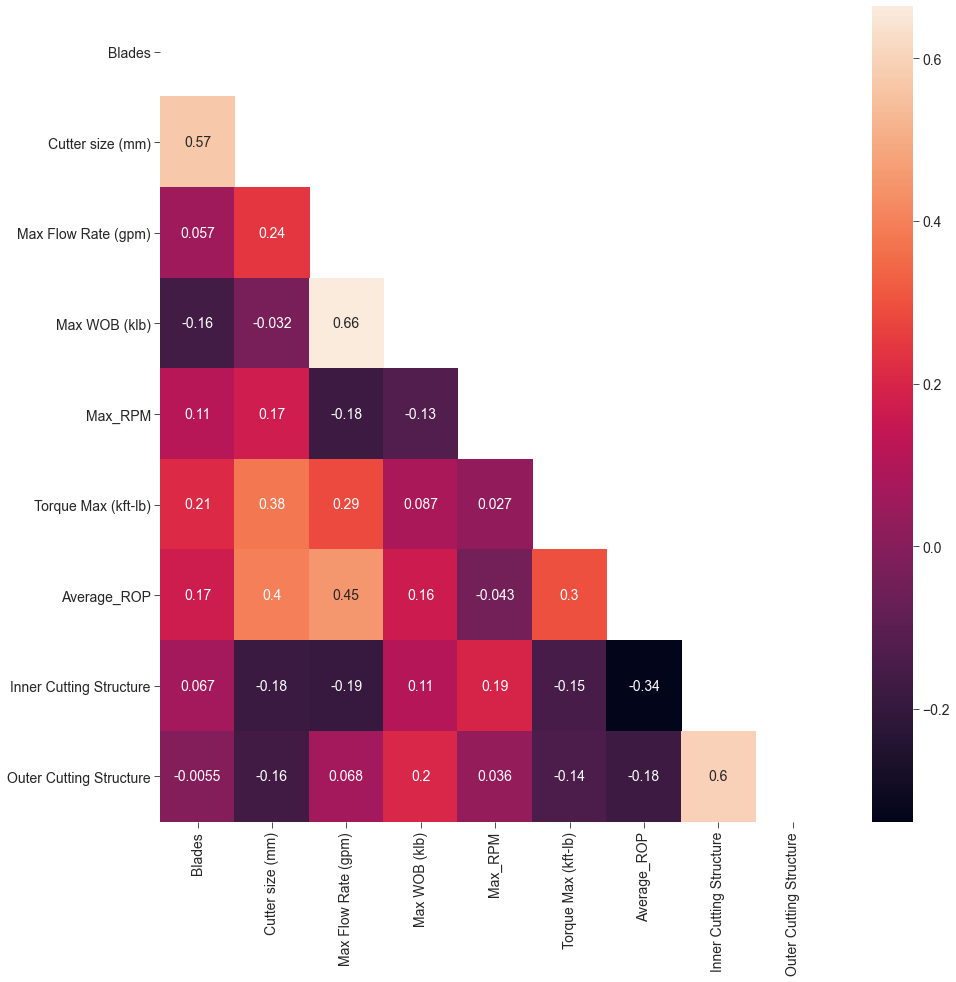

In [121]:
Heatmap=Full_Data[['Manufacturer', 'Type', 'Formation', 'Blades', 'Cutter size (mm)', 
                   'Max Flow Rate (gpm)', 'Max WOB (klb)', 'Max_RPM',
                   'Torque Max (kft-lb)','Average_ROP', 'Inner Cutting Structure', 
                   'Outer Cutting Structure','Dull Grading Characteristics', 'Location']]
# Setting ICS and OCS as intgers for the plot.
Heatmap['Inner Cutting Structure']=Heatmap['Inner Cutting Structure'].astype('int')
Heatmap['Outer Cutting Structure']=Heatmap['Outer Cutting Structure'].astype('int')
fig=plt.figure(figsize=(15,15))
corr= Heatmap.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix)

Hmmm, I'm more intrested to see how what makes the design unique correlate with the resultant dulling but a couple of intresting points (and quite logic to a certain extent):
- The ROP correlates negativly with an increase in dulling.
- It appears also that better cleaning and higher cutting size increases ROP (PS: Not always).
- A decrease in Flow Rate seems to result in higher torque and thus higher dulling grades on both inner and outer sides.

___
## B. Final Notes
- I've broken this project to three parts, this first is the **Exploratory Analysis**. Yet to come the **Model Building** Notebook and **The Data Web Implimantation**, I'll be sharing those as a follow up. And guide you on how you can apply this to your own subjects. But as a good friend told me (*Focus on the technic at the moments, understand your domain well then see how you can apply data analytics and machine learning to it*).
- Either way we found some intresting aspects in the later, yet more intresting things to come ;) we'll have a lot of fun with the interactive graphs in the up later on. So stay tunned.
- Ps: The Notebook is available on my Github. Cheers guys.

---
### Badr Eddine Berrehal (Petroleum Engineer & Data Detective)
- **Email:** [berrehalbadr@gmail.com](berrehalbadr@gmail.com)
- **LinkedIn:** [Badr Berrehal](https://www.linkedin.com/in/badreddine-berrehal-a51010175)
- **Personal Web site:** [UDATA](https://sites.google.com/view/badreddine-berrehal/accueil)
- **GitHub:** [berrehalbadr](https://github.com/berrehalbadr)
- **License Type:** MIT license